# Assignment #3 - Neural Networks

### <font color="red"> DUE: Apr 2 (Tuesday) 11:00 pm </font>  

<font color="blue"> Sai Supreeth Segu </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

- In this assignment, I am going to learn about neural networks and how can we use neural networks for different problems.
- This assignment mainly deals with how non linear regression and non linear logistic regression model performs on given data.
- I will learn how to feed the data into neural network and how to implement a neural network.
- I will learn how to find the best parameter for neural network using kfold.
- Also we will learn about the architecture of the model and which will be more suitable strucure(architecture)
- We can learn about how to validate our model using toy data

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #1 (of course for regression). 

## Description

* The features in this dataset is about all the block groups in California from the 1990 Census. 
* In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 
* Naturally, the geographical area included varies inversely with the population density. 
* We computed distances among the centroids of each block group as measured in latitude and longitude. 
* We excluded all the block groups reporting zero entries for the independent and dependent variables. 
* The final data contained 20,640 observations on 9 variables. 
* The dependent variable is median house value.

## Reading the Data

In [2]:
import pandas as pd
f = pd.read_csv("cali_housing.csv")
f.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0

## Normalizing the Data

In [3]:
for i in range(8):
    max_ = f.iloc[:,i].max();
    min_ = f.iloc[:,i].min();
    f.iloc[:,i] = f.iloc[:,i].apply(lambda x: ((x-min_)/(max_-min_)))
f.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0   0.211155  0.567481          0.784314    0.022331       0.019863   
1   0.212151  0.565356          0.392157    0.180503       0.171477   
2   0.210159  0.564293          1.000000    0.037260       0.029330   
3   0.209163  0.564293          1.000000    0.032352       0.036313   
4   0.209163  0.564293          1.000000    0.041330       0.043296   

   population  households  medianIncome  medianHouseValue  
0    0.008941    0.020556      0.539668          452600.0  
1    0.067210    0.186976      0.538027          358500.0  
2    0.013818    0.028943      0.466028          352100.0  
3    0.015555    0.035849      0.354699          341300.0  
4    0.015752    0.042427      0.230776          342200.0

## Preprocessing the Data

### Checking for Null values in Data

In [4]:
import numpy as np
np.any(f.isnull())

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

### Checking for missing values in Data

In [5]:
np.any(f.isna())

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

In [6]:
f.describe()

longitude      latitude  housingMedianAge    totalRooms  \
count  20640.000000  20640.000000      20640.000000  20640.000000   
mean       0.476125      0.328572          0.541951      0.066986   
std        0.199555      0.226988          0.246776      0.055486   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.253984      0.147715          0.333333      0.036771   
50%        0.583665      0.182784          0.549020      0.054046   
75%        0.631474      0.549416          0.705882      0.080014   
max        1.000000      1.000000          1.000000      1.000000   

       totalBedrooms    population    households  medianIncome  \
count   20640.000000  20640.000000  20640.000000  20640.000000   
mean        0.083318      0.039869      0.081983      0.232464   
std         0.065371      0.031740      0.062873      0.131020   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.045624      0.021974      0.045881      0.142308   
50%         0.067349      0.032596      0.067094      0.209301   
75%         0.100248      0.048264      0.099326      0.292641   
max         1.000000      1.000000      1.000000      1.000000   

       medianHouseValue  
count      20640.000000  
mean      206855.816909  
std       115395.615874  
min        14999.000000  
25%       119600.000000  
50%       179700.000000  
75%       264725.000000  
max       500001.000000

## Plot for understanding or analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(18,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.plot(f.iloc[:50,i])
    plt.title("Line Graph")
    plt.ylabel(f.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()

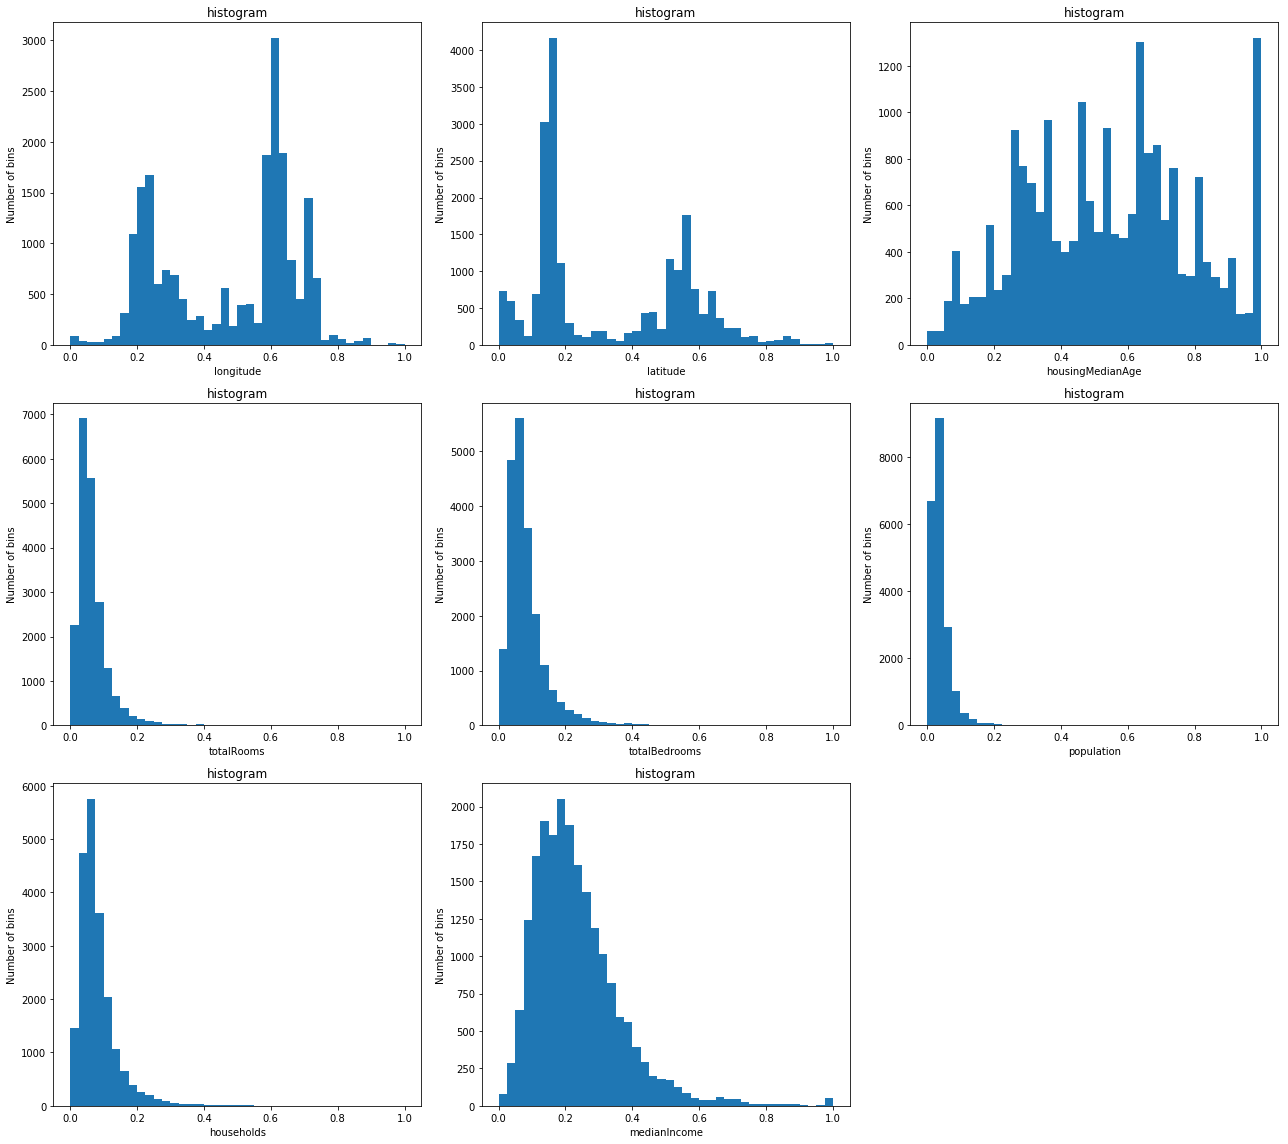

In [7]:
fig = plt.figure(figsize=(18,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(f.iloc[:,i],40)
    plt.title("histogram")
    plt.xlabel(f.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()

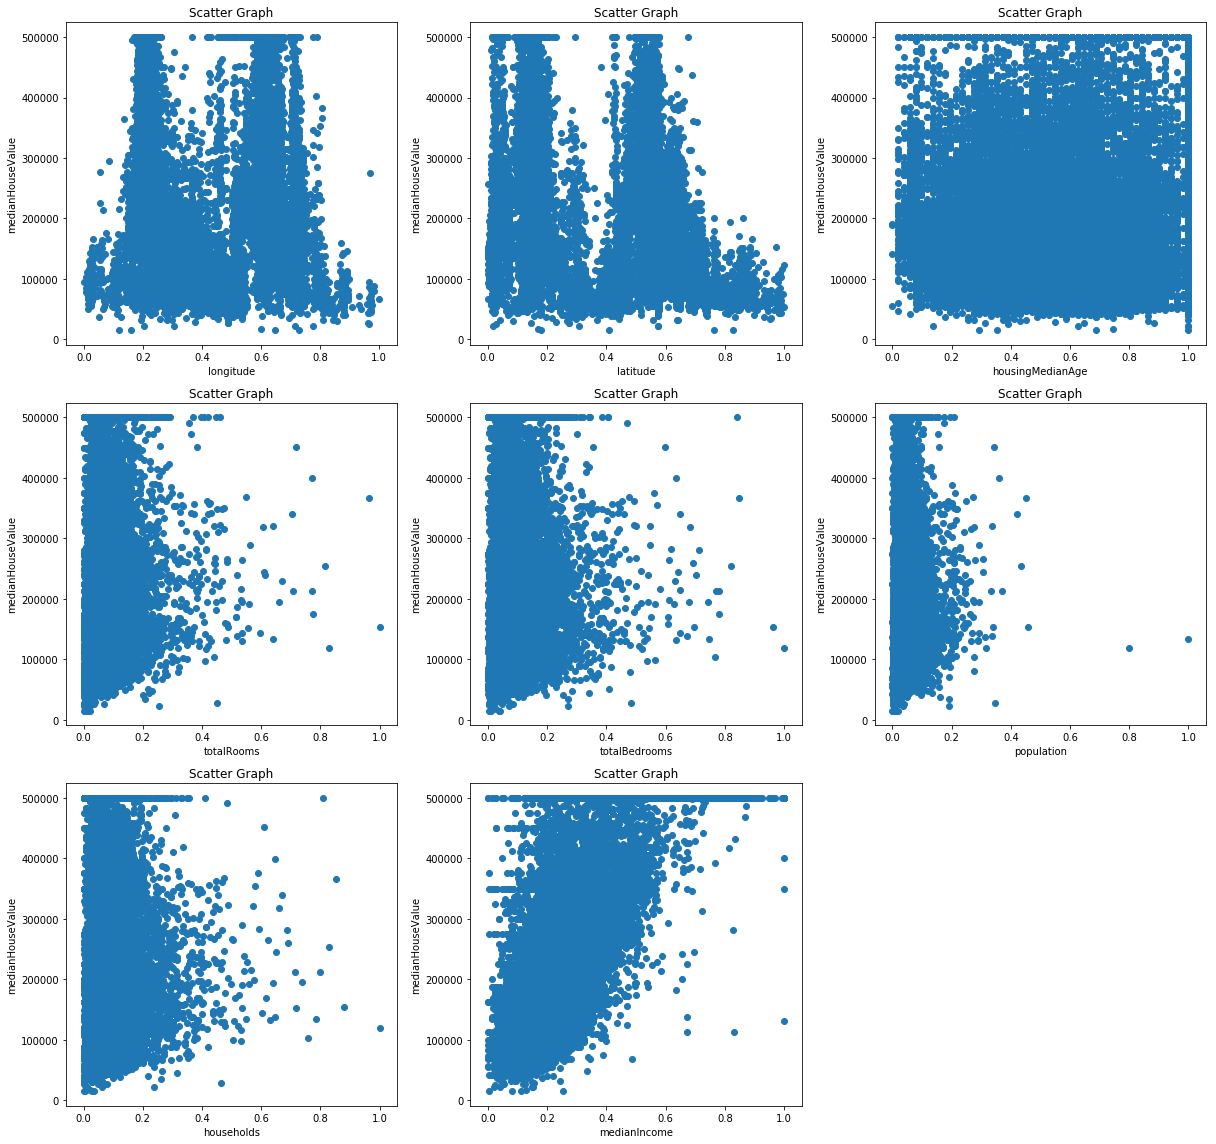

In [8]:
fig = plt.figure(figsize=(17,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.scatter(f.iloc[:,i], f.loc[:,'medianHouseValue'])
    plt.title("Scatter Graph")
    plt.xlabel(f.columns.values[i])
    plt.ylabel("medianHouseValue")
    fig.tight_layout()

## Preliminary Observation

* For doing preprocessing, I have checked for missing values and null values but it doesn't have any of those values. So, data is already preprocessed well.
* I have normalized the data because it will produce more accurate results when we use neural networks.
* From the scatter plot, we can say that most of the data is accumulated at low values and there are few points with higher values for most of the features.

## Introduction of data for Classification & source

* The analysis is performed for different sets of input value for finding the instability in electric grid.  
* Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1.
* There are 11 predictive attributes, 1 non-predictive(p1), 2 goal fields(stab and stabf) 
* Tau[x] is the reaction time of participant. The value is real from the range [0.5,10]s. 
* p[x] is the nominal power consumed(negative)/produced(positive)(real). 
* For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
* g[x] is the coefficient(gamma) proportional to price elasticity. The value of it is real from the range [0.05,1]s^-1.
* stab is the maximal real part of the characteristic equation root. 
* If the value of it is positive then the system is linearly unstable else it is unstable. 
* stabf is the stability label of the system and is categorical into stable or unstable. 

## Reading the Classification Dataset

In [2]:
import pandas as pd
fc = pd.read_csv("Data_for_UCI_named.csv")
fc.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

## Normalizing the Classification Dataset

In [3]:
for i in range(13):
    max_ = fc.iloc[:,i].max();
    min_ = fc.iloc[:,i].min();
    fc.iloc[:,i] = fc.iloc[:,i].apply(lambda x: ((x-min_)/(max_-min_)))
fc.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  0.258801  0.271561  0.829616  0.976978  0.509244  0.811642  0.495075   
1  0.926793  0.463424  0.268117  0.091471  0.813957  0.039894  0.084809   
2  0.891799  0.878795  0.268005  0.075171  0.425652  0.528367  0.481864   
3  0.022700  0.754704  0.419623  0.193715  0.556118  0.648372  0.040670   
4  0.277230  0.748301  0.467747  0.985065  0.453830  0.582991  0.102655   

         p4        g1        g2        g3        g4      stab     stabf  
0  0.184572  0.632098  0.852229  0.881531  0.955894  0.715740  unstable  
1  0.496642  0.382588  0.855215  0.539078  0.770323  0.393359    stable  
2  0.719670  0.118990  0.754440  0.831000  0.062980  0.442940  unstable  
3  0.668412  0.417084  0.975576  0.925677  0.329181  0.576507  unstable  
4  0.963811  0.786481  0.426782  0.638883  0.811553  0.686885  unstable

## Preprocessing the Classification Dataset

### Checking for Null values

In [24]:
import numpy as np
np.any(fc.isnull())

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

### Checking for Missing Values

In [25]:
np.any(fc.isna())

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

In [26]:
fc.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.499986      0.500001      0.499988      0.500004      0.506188   
std        0.288730      0.288699      0.288730      0.288721      0.175663   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.249940      0.250008      0.250007      0.249972      0.382012   
50%        0.499987      0.499999      0.499985      0.499976      0.506428   
75%        0.749988      0.749998      0.750017      0.750014      0.630532   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.499999      0.500006      0.499984      0.500028      0.500002   
std        0.288732      0.288715      0.288709      0.288712      0.288722   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250029      0.249968      0.249994      0.250032      0.250027   
50%        0.500022      0.500023      0.499979      0.500038      0.500005   
75%        0.750051      0.749998      0.749957      0.749979      0.750020   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.499982      0.500022      0.507411  
std        0.288711      0.288719      0.194144  
min        0.000000      0.000000      0.000000  
25%        0.249977      0.249990      0.342879  
50%        0.499997      0.500024      0.514830  
75%        0.749937      0.749977      0.660687  
max        1.000000      1.000000      1.000000

## Visualizing the Classification dataset

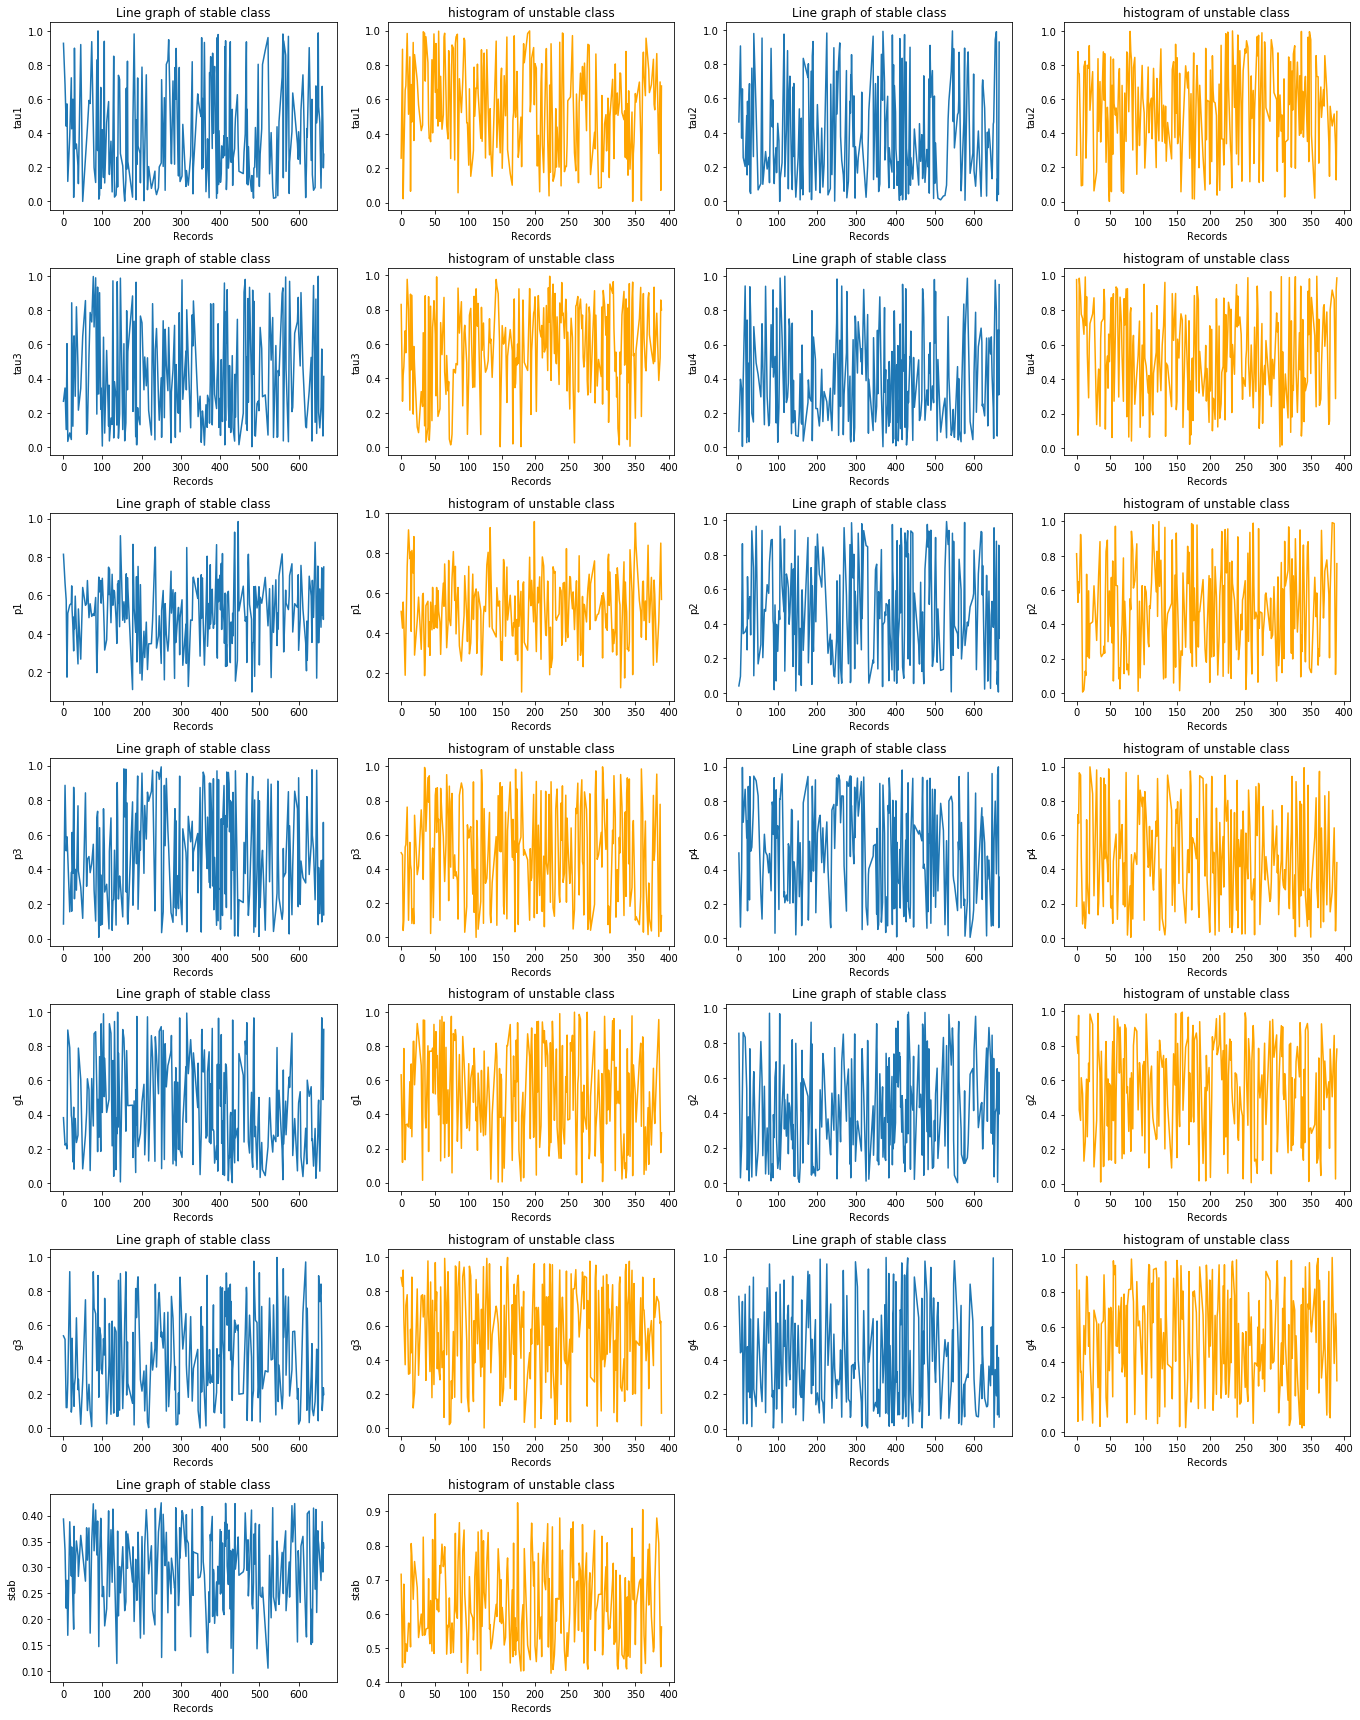

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(19,24))
for i in range(13):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.plot(fc[fc.iloc[:,13]=='stable'].iloc[:250,i])
    plt.title("Line graph of stable class")
    plt.ylabel(fc.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.plot(fc[fc.iloc[:,13]=='unstable'].iloc[:250,i],color = 'orange')
    plt.title("histogram of unstable class")
    plt.ylabel(fc.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()

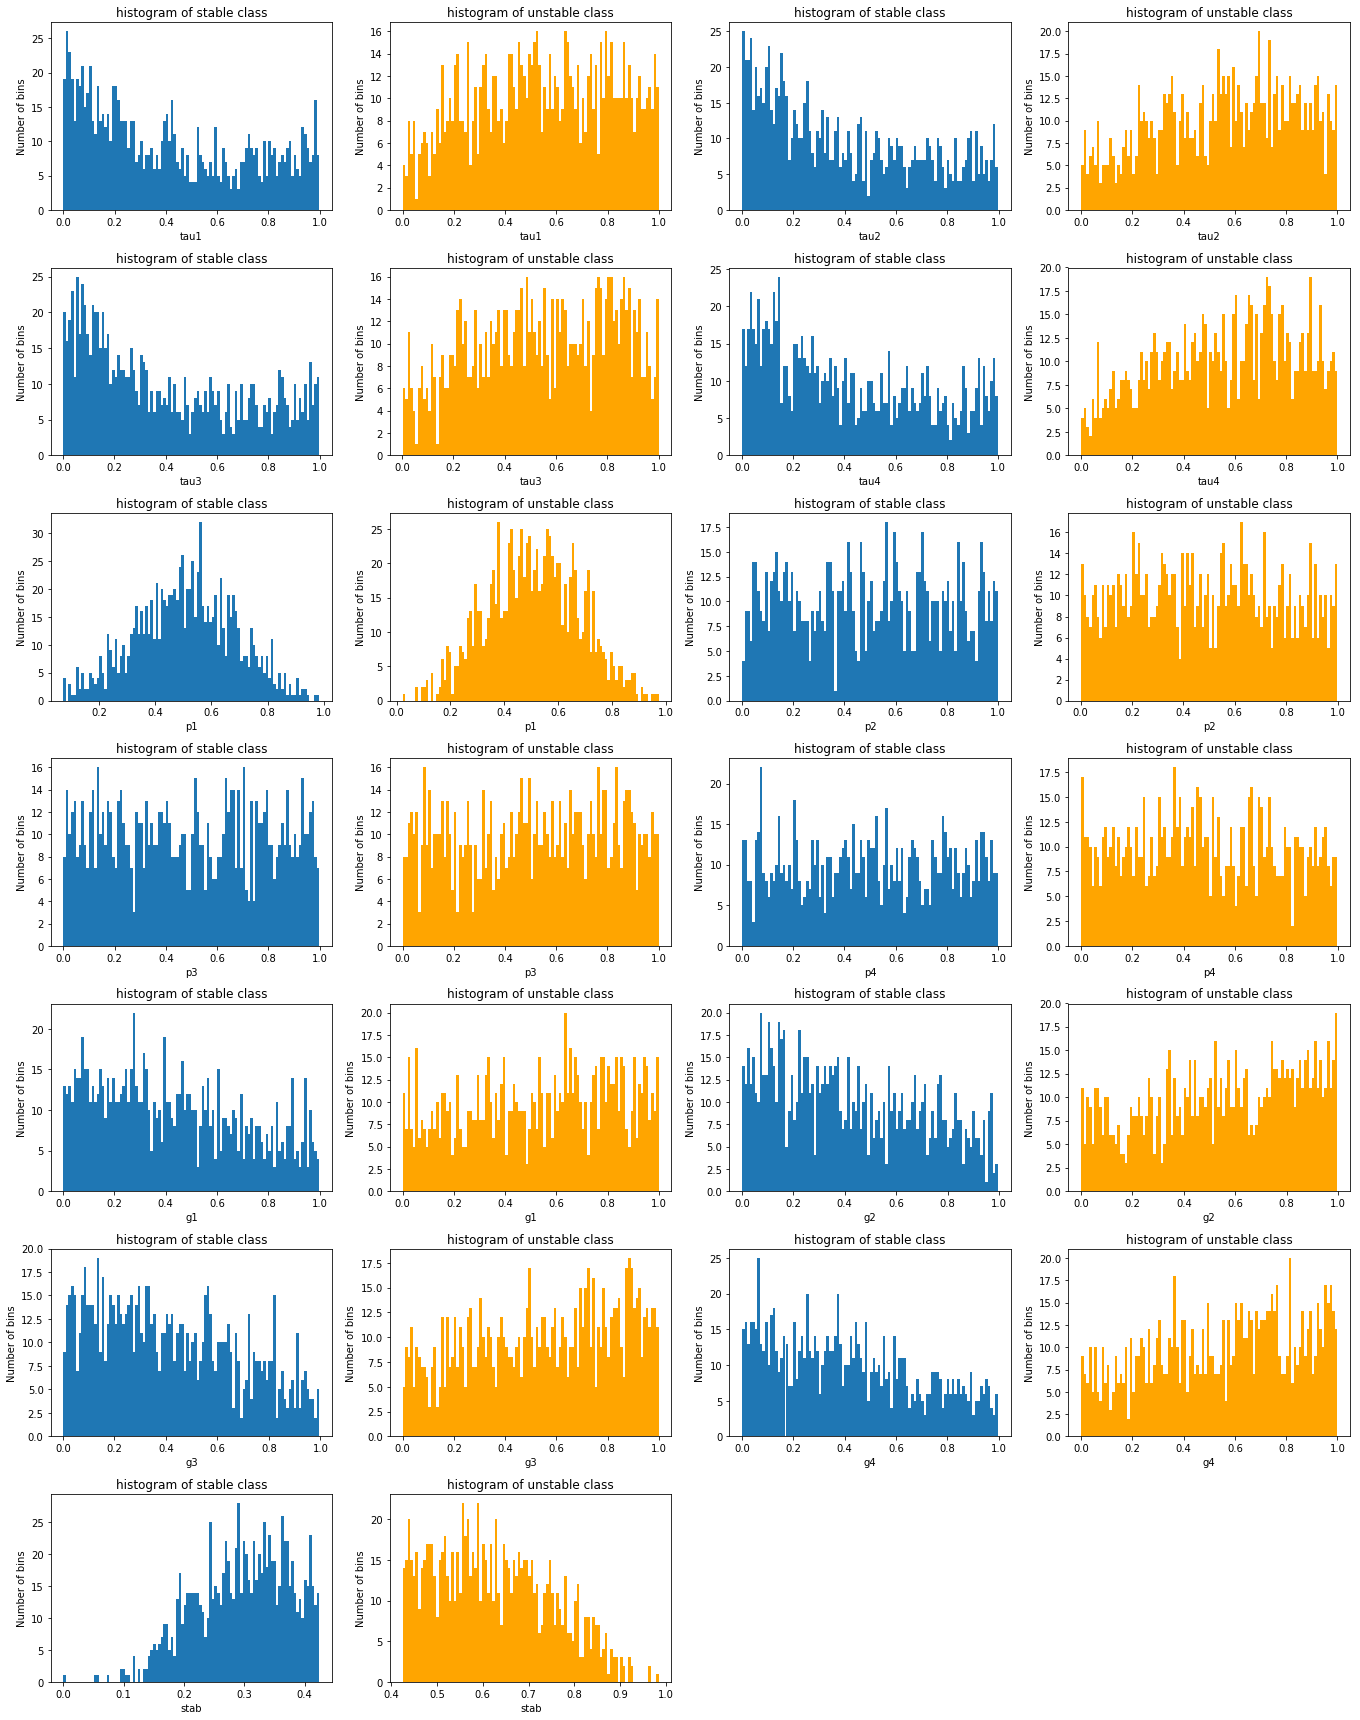

In [28]:
fig = plt.figure(figsize=(19,24))
for i in range(13):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.hist(fc[fc.iloc[:,13]=='stable'].iloc[:1000,i],100)
    plt.title("histogram of stable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.hist(fc[fc.iloc[:,13]=='unstable'].iloc[:1000,i],100,color = 'orange')
    plt.title("histogram of unstable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()

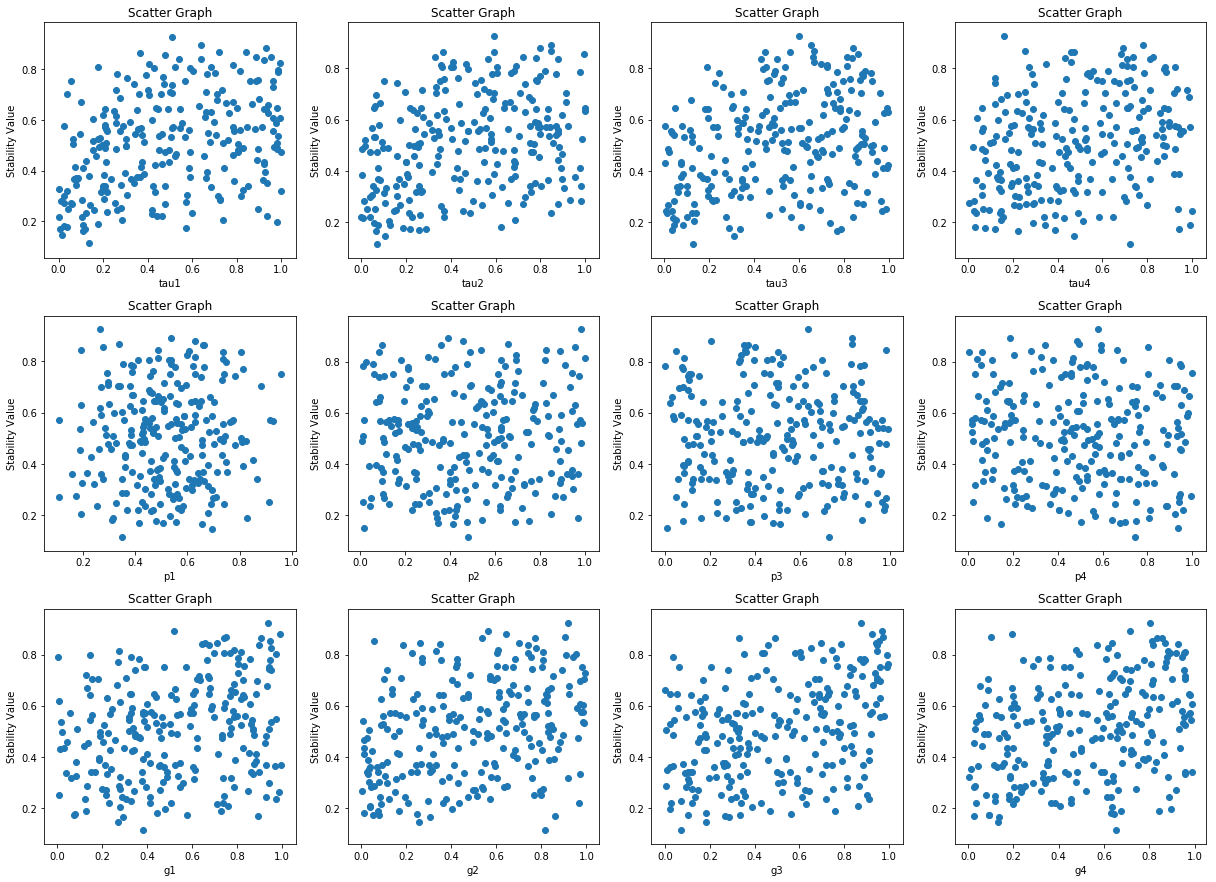

In [29]:
fig = plt.figure(figsize=(17,16))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.scatter(fc.iloc[:250,i], fc.iloc[:250,12])
    plt.title("Scatter Graph")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()

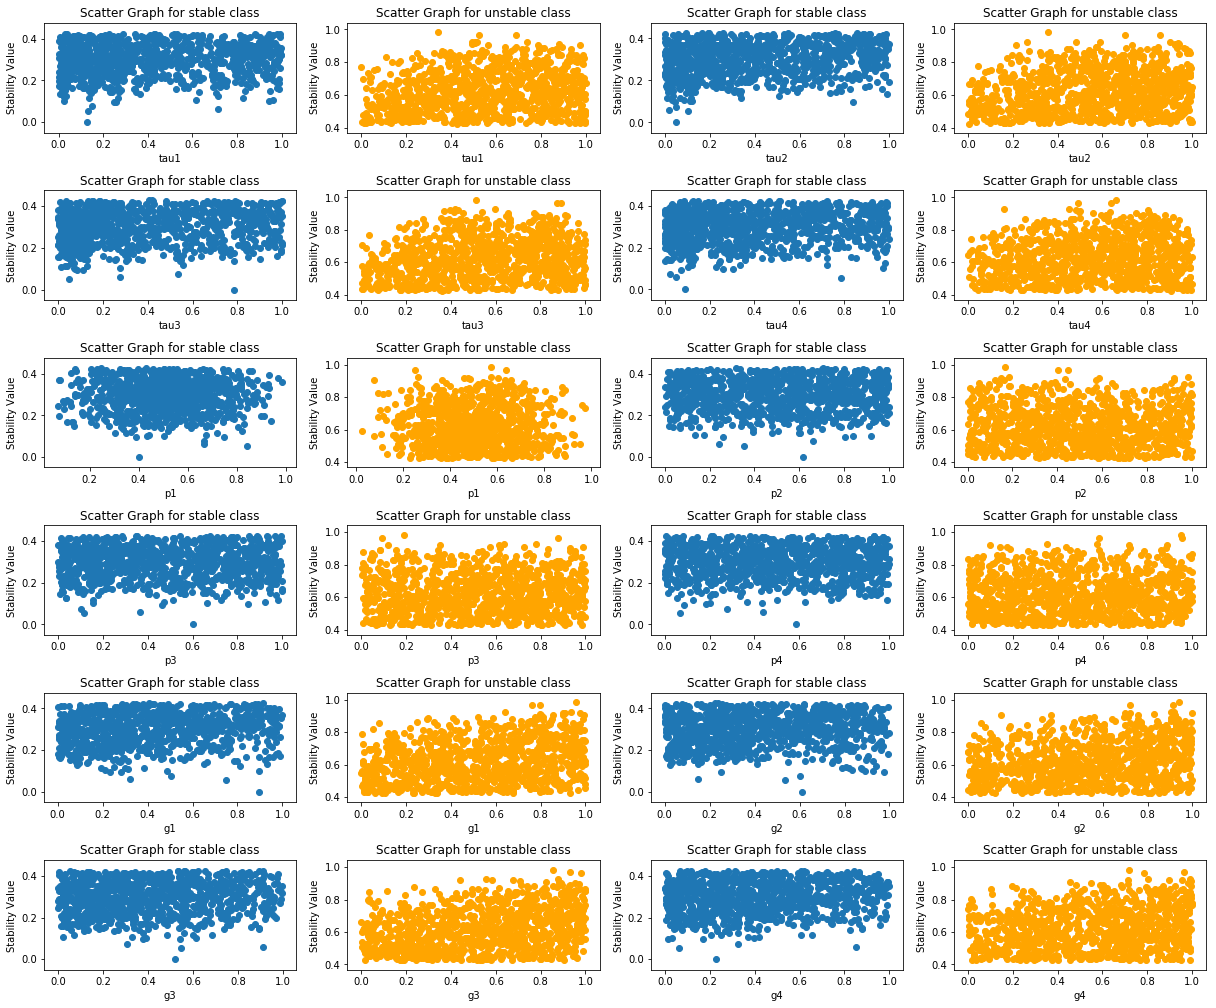

In [30]:
fig = plt.figure(figsize=(17,16))
for i in range(12):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.scatter(fc[fc.iloc[:,13]=='stable'].iloc[:1000,i], fc[fc.iloc[:,13]=='stable'].iloc[:1000,12]) 
    plt.title("Scatter Graph for stable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.scatter(fc[fc.iloc[:,13]=='unstable'].iloc[:1000,i],fc[fc.iloc[:,13]=='unstable'].iloc[:1000,12],color = 'orange')
    plt.title("Scatter Graph for unstable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()

## Preliminary observation

* As discussed above, there are no null and missing values. So, data is preprocessed well.
* From the plot of histogram, we can clearly observe that for the attributes other than p1,p2,p3,p4 the graph is nearly opposite for stable and unstable class. To explain this clearly, Suppose if we take the value of tau1 parameter between(0,0.1) then number of values in stable class is way more than the unstable. It is nearly opposite graph for stable and unstable.
* If we consider p1,p2,p3,p4 attributes, The graph of stable and unstable classes are similar, so we can give less priority to this feature using regularisation in the feature purpose.
* I have normilized mainly because we can use the activation functions in the future.

In [7]:
def rmse(T,Y):
    assert(T.shape==Y.shape)
    return np.sqrt((1/T.shape[0])*np.sum((Y-T)**2))

## III.A 5-fold Cross Validation

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies.

### Summary

* In kfold cross validation, we will divide the training data into k folds. 
* Out of k folds, we will keep one fold as validation fold and train on the remaining folds.
* Comparing the validation error, we select the one that has the lowest validation error as our model.
* In this assignment, we are performing 5-fold Cross validation and also finding the best neural network parameter

### Code Explanation

- I have implemented the code following the algorithm given in lecture note.
- First I have intialised the variables required for algorithm
- I have divided the data into k folds
- First of all i have divided data range into k different parts.
- For dividing i have use numpy arange and shuffle to randomize index first.
- Now i will have k eaqual part of indexs ranging from 0 to (size of data-1).
- After that using algorithm described in class note i am selecting one by one part as test data.
    - for each test part (i)
        1- selectecting one part j as CV and rest of the part as training data
        2- using j and train data training on different paramters 
        3- store all validation error in error dictionary
        - repeat 1-3 step for all different values of j available
        4- selecting the model with lowest mean error {for this i have used numpy argmin}
- kfold function is returning result for each iteration over test partition. This result is tuple of (best_parameter,error).

In [37]:
from nn import NeuralNet

def kfold(X,T,**params):
    assert(X.shape[0]==T.shape[0])
    
    # default params
    k = params.pop('k',5)
    maxiter = params.pop('maxiter',100)
    alphas = params.pop('alpha',0.001)
    verbose = params.pop('verbose',False)
    optimize_alpha = params.pop('optimize_alpha',True)
    # random indexing partition
    sz = X.shape[0]
    offset = int(sz/k)
    index = np.arange(sz)
    np.random.shuffle(index)
    
    part = []
    for i in range(0,k):
        if i == k-1:
            part.append(index[i*offset:])
        else:
            part.append(index[i*offset:(i+1)*offset])
    
    res = []
    for i in range(k):
        print("Training for test part",i+1,"started",)
        XTest = X[part[i]]
        YTest = T[part[i]]
        
        if optimize_alpha:
            cv_error = dict((alpha,0) for alpha in alphas)
        else:
            cv_error = dict((iter_,0) for iter_ in maxiter)
        
        for j in range(k):
            if j==i:
                continue
            if verbose:
                print("\tTraining for CV part",j+1,"started")
            XTrain = None
            YTrain = None
            XCv = X[part[j]]
            YCv = T[part[j]]
            
            for c in range(k):
                if c==j or c==i:
                    continue
                if XTrain is None:
                    XTrain = X[part[c]]
                    YTrain = T[part[c]]
                    continue
                XTrain = np.concatenate([XTrain,X[part[c]]])
                YTrain = np.concatenate([YTrain,T[part[c]]])
            
            #Training overe all params
            if optimize_alpha:
                for alpha in alphas:
                    nn = NeuralNet([X.shape[1],32,32,1])
                    result = nn.train(XTrain,YTrain,niter=maxiter,Lambda=alpha)
                    pred_y = nn.use(XCv)
                    error = rmse(pred_y,YCv)
                    cv_error[alpha]+=error
                if verbose:
                    print("\tTraining for CV part",j+1,"completed")
            else:
                for iter_ in maxiter:
                    nn = NeuralNet([X.shape[1],32,32,1])
                    result = nn.train(XTrain,YTrain,niter=iter_,Lambda=0.001)
                    pred_y = nn.use(XCv)
                    error = rmse(pred_y,YCv)
                    cv_error[iter_]+=error   
                if verbose:
                    print("\tTraining for CV part",j+1,"completed")
                    
        if optimize_alpha:
            #finding best param and retraining
            best_p = alphas[np.argmin(cv_error.values())]
            nn = NeuralNet([X.shape[1],32,32,1])
            result = nn.train(XTrain,YTrain,Lambda=best_p)
            pred_y = nn.use(XTest)
            error = rmse(pred_y,YTest)
            res.append( (best_p , error) )
            print("Best alpha is",best_p,"and error is ",error )
            
        else:
            #finding best params and retraining
            best_p = maxiter[np.argmin(cv_error.values())]
            nn = NeuralNet([X.shape[1],32,32,1])
            result = nn.train(XTrain,YTrain,Lambda=0.001,niter=best_p)
            pred_y = nn.use(XTest)
            error = rmse(pred_y,YTest)
            res.append( (best_p , error) )
            print("Best Iter is",best_p,"and error is ",error )

        print("Training for test part",i+1,"completed")
        print("-"*100)
    
    return res


In [316]:
from sklearn.model_selection import train_test_split
train, test, tar_train, tar_test = train_test_split(f.iloc[:,0:8], f.iloc[:,-1], test_size=0.2, random_state = 12)

In [38]:
result = kfold(train.values,tar_train.values.reshape((tar_train.shape[0],1)),alpha=[0.001,0.01,0.1,1],verbose=True)

Training for test part 1 started
	Training for CV part 2 started
	Training for CV part 2 completed
	Training for CV part 3 started
	Training for CV part 3 completed
	Training for CV part 4 started
	Training for CV part 4 completed
	Training for CV part 5 started
	Training for CV part 5 completed
Best alpha is 0.001 and error is  59459.78689253864
Training for test part 1 completed
----------------------------------------------------------------------------------------------------
Training for test part 2 started
	Training for CV part 1 started
	Training for CV part 1 completed
	Training for CV part 3 started
	Training for CV part 3 completed
	Training for CV part 4 started
	Training for CV part 4 completed
	Training for CV part 5 started
	Training for CV part 5 completed
Best alpha is 0.001 and error is  61534.017939533245
Training for test part 2 completed
----------------------------------------------------------------------------------------------------
Training for test part 3 star

In [40]:
result

[(0.001, 59459.78689253864),
 (0.001, 61534.017939533245),
 (0.001, 58868.94624336059),
 (0.001, 57607.8628814587),
 (0.001, 57200.72589019892)]

## III.B Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 

### Summary of nonlinear regression model

- Neural networks are designed to replicate the functioning of our brain.
- There will be multiple layers in neural networks and each layer have neurons.
- Each neuron in neural network can be think of a perceptron. A perceptron will generate discrete outputs by passing the output of linear model to the step function.
- By connecting the perceptrons, we can actually build synaptic connections. We call this model as multi-layer perceptron (MLP).
- MultiLayer Perceptron is also called as artificial neural network.

- In Neural Network, we will pass input and will get output.
- Neural network will have atleast two layers and these layers are
    - input layer(1)
    - hidden layer(0 or more)
    - output layer(1)
- The number of neurons in input layer is same as input size.
- The number of neurons in hidden layer and output layer depends on your model structure.
- In each layer, we will multiply the input with some weight and depending on your error weights will be update.
- We can update these weights using Gradient descent and there are many other ways also.
- In each layer, there will be activation function so that output will be in a particular range of values.
- There are different types of activation functions like Sigmoid, softmax and relu.

### Code Explanation

* I have imported the provided NeuralNet class and have passed the splitted train values and target values into the neural network and trained it.
* I have then passed the train and test values to neural network and then calculated the RMSE in both the cases.

In [21]:
print("Input values shape: ",train.values.shape)
print("Predicted values shape: ",np.atleast_2d(tar_train.values).T.shape)

Input values shape:  (16512, 8)
Predicted values shape:  (16512, 1)


In [320]:
from nn import NeuralNet
nn1 = NeuralNet(nunits=[8,16,8,1])
nn1.train(train.values,np.atleast_2d(tar_train.values).T,Lambda = 0.001,niter=500)

{'w': array([-1.82362273e-01,  7.53745178e-02, -2.62642236e-02,  1.57164015e-01,
         3.68081776e-01, -5.47140361e-01,  1.62862061e-01, -1.31274095e-01,
        -5.71689270e-02,  2.06069689e-01,  1.26137059e-02, -5.30037869e-04,
         1.05951484e+00,  5.62514259e-01, -7.97481186e-01,  3.62400039e-01,
        -7.57493829e-02, -5.13726445e-01, -8.53796341e-02, -1.11396426e-01,
         2.41664157e-01,  2.80910586e-01, -2.17642451e-01, -3.44647606e-01,
        -2.91331273e-01, -2.05692047e-01, -1.32381342e-01, -2.40959861e-01,
         4.55544881e-01, -2.38604042e-01, -4.45220687e-01, -3.11937923e-02,
        -4.49569568e-02, -6.86806192e-01, -1.97670172e-01,  6.57115887e-02,
         7.23395881e-01,  1.75499457e-01, -1.41458259e-01, -3.76125725e-01,
        -2.02723322e-01, -7.21549167e-02,  1.91551549e-02, -1.61106538e-01,
         6.36576477e-01, -2.27726715e-01, -5.68208807e-01, -6.82557253e-02,
         2.44845146e-01,  1.20999800e-02,  5.85570261e-02,  8.85044975e-02,
       

In [321]:
Y11 = nn1.use(train.values)
print("Train Rmse is ",rmse(Y11, np.atleast_2d(tar_train.values).T))

Train Rmse is  59143.95652758136


In [322]:
Y12 = nn1.use(test.values)
print("Test Rmse is",rmse(Y12,np.atleast_2d(tar_test.values).T))

Test Rmse is 58862.14660885696


## III.C Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment). 

## Summary

- Nonlinear Logistic Regression is used for classifying the given input data
- In this method, we are going to find the probability of the given input data for a both the classes
- Nonlinear Logistic Regression will assign the given input data to the class having more probability
- Nonlinear Logistic Regression use activation function in output layer also to calculate the probability
- The error function in this model is defined as 
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

### Explanation of code

- I have intialised the variables required in init function
- In the forward function, I have written code for sigmoid function for the output layer so that it will give values in the range of (0,1)
- In the objectf function, I have changed error same as the error given in the lecture note
- In train function, I have encoded the Target output into format (1,0) if it is 0 and (0,1) if it is 1
- In test function, I have removed the unpacked function and return the probabilities along with labels by considering values having more probability

In [102]:
from nn import NeuralNet
from util import Standardizer
from copy import copy
from grad import scg
import numpy as np
class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        #self.activation = 
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
            
        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                print(t)
                e = np.exp(t)
                a = e / (np.sum(e, axis=1, keepdims=True) if len(X.shape) == 2 else np.sum(e))
                t = a
                #print(np.sum(e, axis=0, keepdims=True))
                print("output:",t)
                
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        #print("target",T)
        #print("predicted",Y)
        #print("jksddlhjf",-np.dot(T, np.log(Y).T))
        #print("lsdjjldljsd",-np.dot(1-T,np.log(1-Y).T))
        #print(np.mean((np.add(-np.dot(T, np.log(Y).T),-np.dot(1-T,np.log(1-Y).T)))))
        #if np.isnan(-np.dot(T, np.log(Y).T)).any():
            #return 0;
        return np.mean((np.add(-np.dot(T, np.log(Y).T),-np.dot(1-T,np.log(1-Y).T)))) + wpenalty
    
    #def _errorf(self, T, Y):
        #return -(np.add(np.dot(T, np.log(Y)),np.dot(1-T,np.log(1-Y))))
    
    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        targetLength = len(T)
        #print(targetLength)
        newT = T.astype(int).ravel()
        #print(newT)
        #print(newT[:10])
        #print(newT.shape)
        T = np.zeros((targetLength, 2))
        T[np.arange(targetLength),newT.astype(int)] = 1
        #print("encoded value:",T)
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.01)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        #print("jdsnskdj",T)
        #if self.stdT == None and self.stdTarget:
            #self.stdT = Standardizer(T)
            #T = self.stdT.standardize(T)
            #print("njldsnljds",T)
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            #print(T)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result
    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X, retZ = False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        #if self.stdT is not None:
            #Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        label = []
        for i in range(len(Y)):
            if Y[i][0] > Y[i][1]:
                label.append(0)
            else:
                label.append(1)
        return Y,label


Text(0.5,1,'test data set')

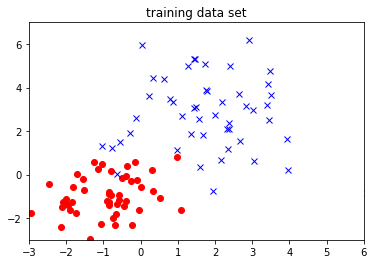

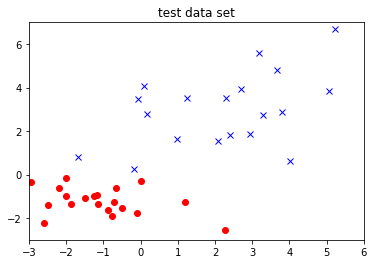

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")


In [103]:
# Apply Nonlinear Logistic Regression
import nn
from imp import reload
reload(nn)
#import warnings 
#warnings.filterwarnings('ignore')

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
Y,classes = clsf.use(Xtest)
#print(Y)
#print(Y.shape)
#print(Ttest)
#print(Ttest.shape)
#print(classes)

[[-0.0952574  -0.06000562]
 [-0.10006209 -0.05973798]
 [-0.10537271 -0.06408036]
 [-0.10291081 -0.06311657]
 [-0.1095429  -0.07432834]
 [-0.10033055 -0.06304527]
 [-0.10227676 -0.06213405]
 [-0.10694253 -0.07040315]
 [-0.09742384 -0.06071846]
 [-0.10435937 -0.05765404]
 [-0.1054261  -0.06545609]
 [-0.10185452 -0.06277001]
 [-0.09955535 -0.06227855]
 [-0.10712665 -0.07191922]
 [-0.10785078 -0.06572281]
 [-0.0981701  -0.05956849]
 [-0.09893886 -0.0557963 ]
 [-0.09920923 -0.05554324]
 [-0.09289968 -0.05396055]
 [-0.10350358 -0.06293405]
 [-0.10575955 -0.06623547]
 [-0.10643139 -0.068556  ]
 [-0.10469328 -0.06404897]
 [-0.10603052 -0.06952378]
 [-0.09772543 -0.05938047]
 [-0.10861533 -0.06632353]
 [-0.1021972  -0.06368515]
 [-0.10408421 -0.06498605]
 [-0.09911194 -0.06466047]
 [-0.10565956 -0.0701375 ]
 [-0.1013854  -0.06314253]
 [-0.10326539 -0.07099134]
 [-0.10550538 -0.06584708]
 [-0.10551413 -0.06536596]
 [-0.10523688 -0.07346777]
 [-0.10231368 -0.05993018]
 [-0.09908142 -0.0635032 ]
 

/Users/supreeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp
/Users/supreeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/Users/supreeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

 [0.4984109  0.5015891 ]]
[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [

 [0.4984109  0.5015891 ]]
[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

 [-0.09946921 -0.0931128 ]]
output: [[0.50111195 0.49888805]
 [0.50169601 0.49830399]
 [0.5014842  0.4985158 ]
 [0.50139126 0.49860874]
 [0.50006381 0.49993619]
 [0.50111953 0.49888047]
 [0.50150147 0.49849853]
 [0.50049874 0.49950126]
 [0.50122313 0.49877687]
 [0.50254914 0.49745086]
 [0.5012384  0.4987616 ]
 [0.50133846 0.49866154]
 [0.50117414 0.49882586]
 [0.50024139 0.49975861]
 [0.50145254 0.49854746]
 [0.50151709 0.49848291]
 [0.50229386 0.49770614]
 [0.50237021 0.49762979]
 [0.50195562 0.49804438]
 [0.50148973 0.49851027]
 [0.50113218 0.49886782]
 [0.50078094 0.49921906]
 [0.50141585 0.49858415]
 [0.50056007 0.49943993]
 [0.50150206 0.49849794]
 [0.50142518 0.49857482]
 [0.50120856 0.49879144]
 [0.50117772 0.49882228]
 [0.50068796 0.49931204]
 [0.50040708 0.49959292]
 [0.50121841 0.49878159]
 [0.49998678 0.50001322]
 [0.50117552 0.49882448]
 [0.50126448 0.49873552]
 [0.4997501  0.5002499 ]
 [0.50190912 0.49809088]
 [0.50089689 0.49910311]
 [0.50135325 0.49864675]
 [0.50009955 0

 [0.4984109  0.5015891 ]]
[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [

 [0.4984109  0.5015891 ]]
[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [

 [0.4984109  0.5015891 ]]
[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

 [0.4984109  0.5015891 ]]
[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [

[[-0.08116905 -0.08561686]
 [-0.08413723 -0.09092129]
 [-0.088795   -0.0947318 ]
 [-0.08694499 -0.09251003]
 [-0.09449073 -0.09474599]
 [-0.08528546 -0.08976358]
 [-0.08625142 -0.09225733]
 [-0.09166905 -0.09366402]
 [-0.08275347 -0.08764599]
 [-0.08624462 -0.09644126]
 [-0.08923692 -0.09419051]
 [-0.08617159 -0.09152543]
 [-0.08456671 -0.08926327]
 [-0.09223593 -0.0932015 ]
 [-0.09085886 -0.09666905]
 [-0.08288735 -0.08895571]
 [-0.08226058 -0.09143609]
 [-0.08235698 -0.09183787]
 [-0.0778966  -0.08571913]
 [-0.08726743 -0.09322638]
 [-0.08968013 -0.09420887]
 [-0.09079581 -0.09391957]
 [-0.0883538  -0.09401723]
 [-0.09082758 -0.09306787]
 [-0.08254989 -0.08855815]
 [-0.09152408 -0.0972248 ]
 [-0.08666011 -0.09149438]
 [-0.0882444  -0.09295528]
 [-0.08498932 -0.08774117]
 [-0.09077339 -0.09240171]
 [-0.08598397 -0.09085763]
 [-0.0895032  -0.08945032]
 [-0.08940329 -0.09410537]
 [-0.08926618 -0.0943241 ]
 [-0.09149184 -0.09049223]
 [-0.08562225 -0.09325877]
 [-0.08462785 -0.0882154 ]
 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:  95.0 %


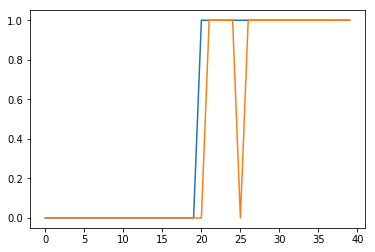

In [104]:
plt.plot(Ttest)
plt.plot(classes)
print(classes)
print(Ttest.ravel())
print("Accuracy: ", 100 - np.mean(np.abs(classes - Ttest.ravel())) * 100, "%")

In [4]:
fc['stabf'] = fc['stabf'].apply(lambda x: 1 if x=='stable' else 0)

In [5]:
from sklearn.model_selection import train_test_split
train, test, tar_train, tar_test = train_test_split(fc.iloc[:,0:12], fc.iloc[:,-1], test_size=0.3, random_state = 12)


In [12]:
import numpy as np
np.atleast_2d(tar_train.values).T

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [19]:
Ttrain

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [105]:
nn3 = NeuralNetLogReg(nunits=[12,16,8,2])
nn3.train(train.values,np.atleast_2d(tar_train.values).T,Lambda = 0.001,niter=10)

[[ 0.07467416 -0.04922336]
 [ 0.09235209 -0.05910477]
 [ 0.07288897 -0.05794543]
 ...
 [ 0.05703696 -0.04648036]
 [ 0.07474398 -0.04526009]
 [ 0.07369918 -0.04065656]]
output: [[0.53093482 0.46906518]
 [0.537792   0.462208  ]
 [0.53266202 0.46733798]
 ...
 [0.52585624 0.47414376]
 [0.52996506 0.47003494]
 [0.52855782 0.47144218]]
[[ 0.07467416 -0.04922336]
 [ 0.09235209 -0.05910477]
 [ 0.07288897 -0.05794543]
 ...
 [ 0.05703696 -0.04648036]
 [ 0.07474398 -0.04526009]
 [ 0.07369918 -0.04065656]]
output: [[0.53093482 0.46906518]
 [0.537792   0.462208  ]
 [0.53266202 0.46733798]
 ...
 [0.52585624 0.47414376]
 [0.52996506 0.47003494]
 [0.52855782 0.47144218]]
[[ 0.07467416 -0.04922336]
 [ 0.09235209 -0.05910477]
 [ 0.07288897 -0.05794543]
 ...
 [ 0.05703696 -0.04648036]
 [ 0.07474398 -0.04526009]
 [ 0.07369918 -0.04065656]]
output: [[0.53093482 0.46906518]
 [0.537792   0.462208  ]
 [0.53266202 0.46733798]
 ...
 [0.52585624 0.47414376]
 [0.52996506 0.47003494]
 [0.52855782 0.47144218]]
[[ 0

/Users/supreeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp
/Users/supreeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/Users/supreeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


[[ 0.29660925 -0.27174383]
 [ 0.33522939 -0.3003088 ]
 [ 0.29982023 -0.28403721]
 ...
 [ 0.26930478 -0.26000212]
 [ 0.3020685  -0.27186279]
 [ 0.28937511 -0.25860759]]
output: [[0.63838307 0.36161693]
 [0.65374417 0.34625583]
 [0.64195452 0.35804548]
 ...
 [0.62932144 0.37067856]
 [0.6396698  0.3603302 ]
 [0.63366744 0.36633256]]
[[ 0.29650986 -0.27126903]
 [ 0.32247931 -0.28872027]
 [ 0.29646691 -0.28118895]
 ...
 [ 0.27600729 -0.26581644]
 [ 0.2993812  -0.26960954]
 [ 0.29310811 -0.26096491]]
output: [[0.63825051 0.36174949]
 [0.6482144  0.3517856 ]
 [0.64052784 0.35947216]
 ...
 [0.63223656 0.36776344]
 [0.63853026 0.36146974]
 [0.63508005 0.36491995]]
[[ 0.29643557 -0.27112363]
 [ 0.32025783 -0.28671981]
 [ 0.29589093 -0.28070811]
 ...
 [ 0.27712636 -0.26676724]
 [ 0.29892331 -0.26923278]
 [ 0.29364417 -0.26124134]]
output: [[0.63819978 0.36180022]
 [0.64725105 0.35274895]
 [0.64028447 0.35971553]
 ...
 [0.6327177  0.3672823 ]
 [0.63833759 0.36166241]
 [0.63526832 0.36473168]]
[[ 0

{'w': array([ 1.07313795e-02, -2.27450568e-02,  5.02055328e-02,  4.95624926e-02,
         7.49752233e-02,  6.89393748e-02, -8.84863896e-02,  6.85105513e-02,
        -5.68344667e-02, -5.71744958e-02, -5.28969095e-02, -1.16232345e-02,
        -1.00780279e-01, -8.33966352e-02, -3.80888966e-02,  1.31261996e-02,
         2.19535258e-02, -7.75864906e-02,  3.26605186e-02,  1.39837614e-03,
        -9.10816412e-02,  8.16593631e-02,  8.66715251e-02, -2.77974542e-02,
        -8.01861139e-02,  9.45009312e-02, -5.95932464e-02, -4.69102032e-02,
        -9.83055289e-02,  5.99907028e-02, -5.18158046e-03, -6.57737888e-03,
        -7.00571004e-02, -4.86252437e-02, -7.04334575e-03, -5.58665473e-02,
        -4.59808917e-03, -3.19684283e-02, -5.86219531e-03,  4.92843710e-02,
         9.16745636e-02, -1.26168279e-02, -9.12158827e-02, -5.80445192e-02,
        -4.83173911e-02,  1.01090143e-01, -6.16932231e-02, -8.59120751e-02,
        -3.27701966e-02, -2.46530007e-04,  3.31327265e-02, -6.54785689e-02,
       

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

### Presentation of CV results:

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline
def plot_cv(d):
    fig = plt.figure(figsize=(14,8))
    x = list(range(1,len(d)+1))
    y = [xx[1] for xx in d]    
    plt.plot(x,y)
    plt.xlabel("Test part No",size=15)
    plt.ylabel("Avg Rmse Error",size=15)
    avg = np.mean(y)

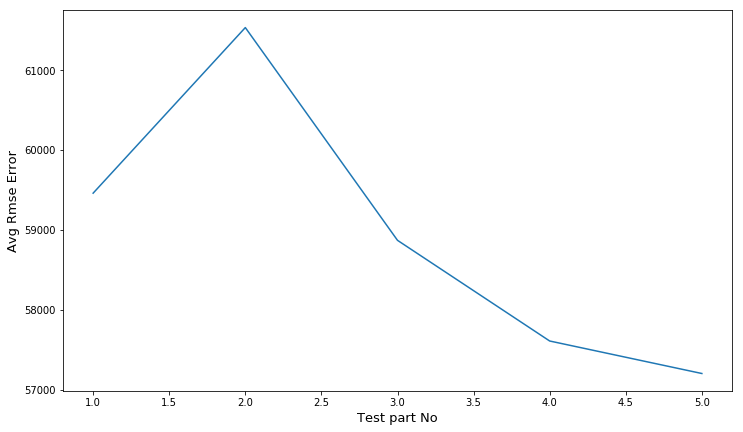

In [54]:
plot_cv(result)

### Selecting number of iterations

In [324]:
iterations = [10,50,100,200,250,500,1000]

In [325]:
result_iter = kfold(train.values,tar_train.values.reshape((tar_train.shape[0],1)),maxiter=iterations,optimize_alpha=False,verbose=True)

Training for test part 1 started
	Training for CV part 2 started
	Training for CV part 2 completed
	Training for CV part 3 started
	Training for CV part 3 completed
	Training for CV part 4 started
	Training for CV part 4 completed
	Training for CV part 5 started
	Training for CV part 5 completed
Best Iter is 10 and error is  69223.48799175816
Training for test part 1 completed
----------------------------------------------------------------------------------------------------
Training for test part 2 started
	Training for CV part 1 started
	Training for CV part 1 completed
	Training for CV part 3 started
	Training for CV part 3 completed
	Training for CV part 4 started
	Training for CV part 4 completed
	Training for CV part 5 started
	Training for CV part 5 completed
Best Iter is 10 and error is  68223.1125578145
Training for test part 2 completed
----------------------------------------------------------------------------------------------------
Training for test part 3 started
	Train

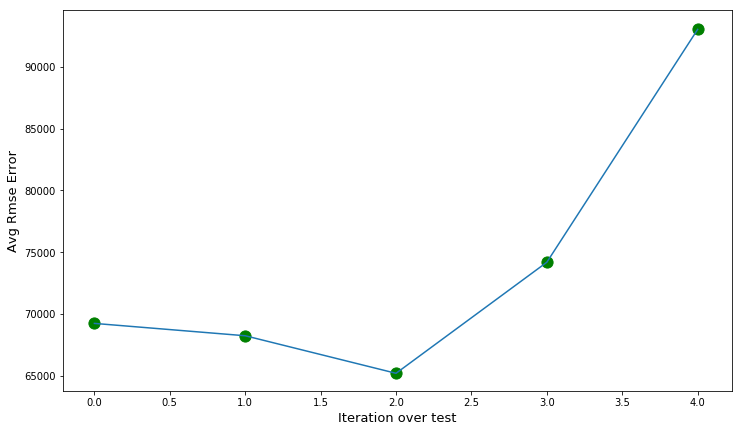

In [326]:
fig = plt.figure(figsize=(12,7))
x = list(range(len(result_iter)))
plt.ylabel("Avg Rmse Error",size=13)
plt.xlabel("Iteration over test",size=13)
y = [i[1] for i in result_iter]
for i,xy in enumerate(zip(x,y)):
    plt.scatter(*xy,s=125,c='G')
plt.plot(x,y)

### Plot for results

In [58]:
def plot_op(y1,y2):
    assert(len(y1)==len(y2))
    fig = plt.figure(figsize=(14,5))
    plt.plot(np.arange(len(y1)),y1,'r-')
    plt.plot(np.arange(len(y1)),y2,'b-')

In [70]:
def train_and_test(a,**params):
    nne = NeuralNet(a)
    res = nne.train(train.values,np.atleast_2d(tar_train.values).T,**params) 
    ypred = nne.use(test.values)
    return ypred

In [71]:
lambdas = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
error_over_lambda = []
for lambda_ in lambdas:
    ypred = train_and_test([8,16,8,1],niter=100,Lambda=lambda_)
    error_over_lambda.append(rmse(ypred,ytest))

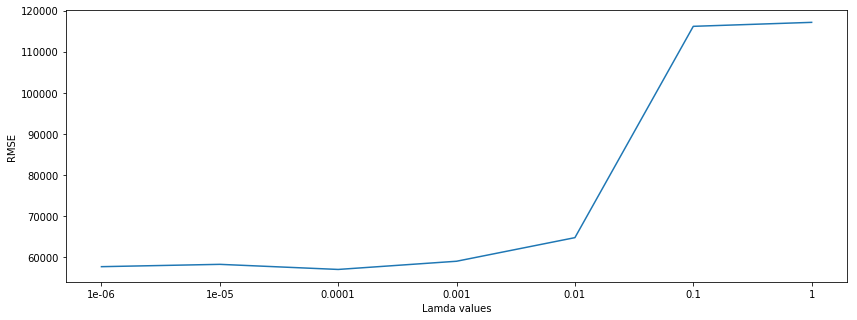

In [72]:
fig = plt.figure(figsize=(14,5))
xx = np.arange(len(lambdas))
plt.xlabel('Lamda values')
plt.ylabel('RMSE')
plt.xticks(xx,lambdas)
plt.plot(xx,error_over_lambda)

In [78]:
niteration = [10,50,100,150,250,500,1000]
error_over_iter = []
for iter_ in niteration:
    ypred = train_and_test([8,16,8,1],niter=iter_,Lambda=0.01)
    error_over_iter.append(rmse(ypred,ytest))

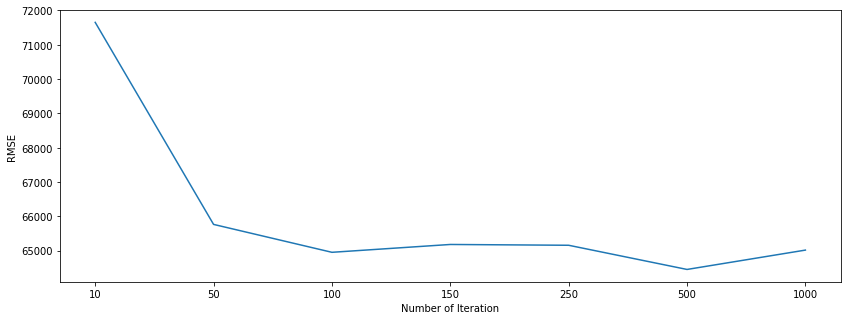

In [80]:
fig = plt.figure(figsize=(14,5))
xx = np.arange(len(niteration))
plt.xlabel('Number of Iteration')
plt.ylabel('RMSE')
plt.xticks(xx,niteration)
plt.plot(xx,error_over_iter)

### Discussions about parameter/network structure choice

- The parameters needed to be optimized for a network are:
    - hidden layer size
    - numbers of hidden layers
    - Lambda
    - number of iterations   

#### Lambda Selection :
- In the above plot, I have run the model using different values of Lambdas
- I have taken some sample values from 1e-6 to 1
- After training neural network with different values of lambdas, I have plotted the RMSE values.
- From the graph, we can observe that for lower values of lambdas the values are almost same but for 0.0001 RMSE is little bit low compared to other lower values.
- From 0.0001 if we are increaing the values then RMSE is increasing exponentially.
- So,I have choosen lambda as 0.0001

#### Iteration Selection:
- In the above plot, I have run the model with different number of iterations
- I have taken some sample values from 10 to 1000
- After training neural network with different number of iterations, I have plotted the RMSE values.
- From the graph, we can observe that RMSE value decreases rapidly from iterations 10 to 50
- Then it is decreasing slowly upto 500
- After 500 RMSE value is increasing slowly which means the model is overfitting
- So the ideal value for the number of iterations would be 500

- After choosing Lambda and number of iterations, I have perfomed some experiments and found the optimal model for my data
    - model layer : [8,16,8,1]
    - niter : 500
    - lambda : 0.001

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

In [300]:
optimal_nn = NeuralNet([8,16, 8,1])
optimal_res = optimal_nn.train(xtrain,ytrain,Lambda=0.0001,niter=1000,ftracep=True)
op = optimal_nn.use(xtest)

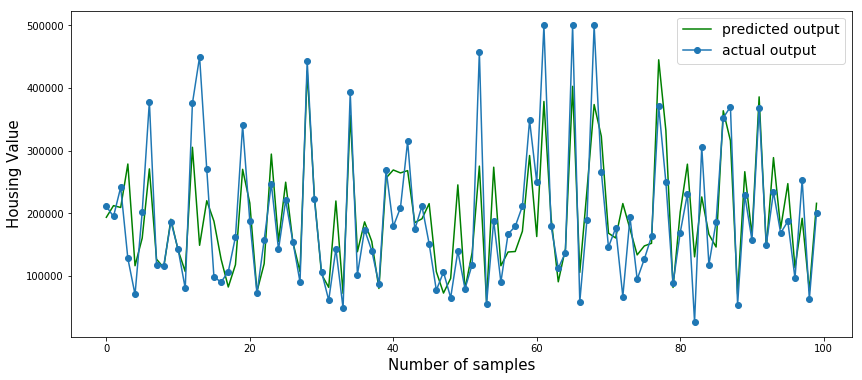

In [471]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,op[:100],'g-',label='predicted output')
plt.plot(x,ytest[:100],'o-',label='actual output')  
plt.ylabel('Housing Value',size=15)
plt.xlabel('Number of samples',size=15)
plt.legend(prop={'size':14})

- Green line represents predicted values and blue line represents actual values
- From the above graph, we can say that predicted values are more closer to actual values
- If there is more gap between red and blue lines then error will be high
- For non linear regression model we can analyze that it is able to capture cuves like this in data which means nonlinear regression model can learn some complex functions where feartures are quadratic or exponentially related.

In [301]:
def plot_trace():
    fig = plt.figure(figsize=(20,10))
    x = np.arange(len(optimal_nn.ftrace))
    plt.xlabel("iteration",size=13)
    plt.ylabel("rmse",size=13)
    plt.plot(x,optimal_nn.ftrace)

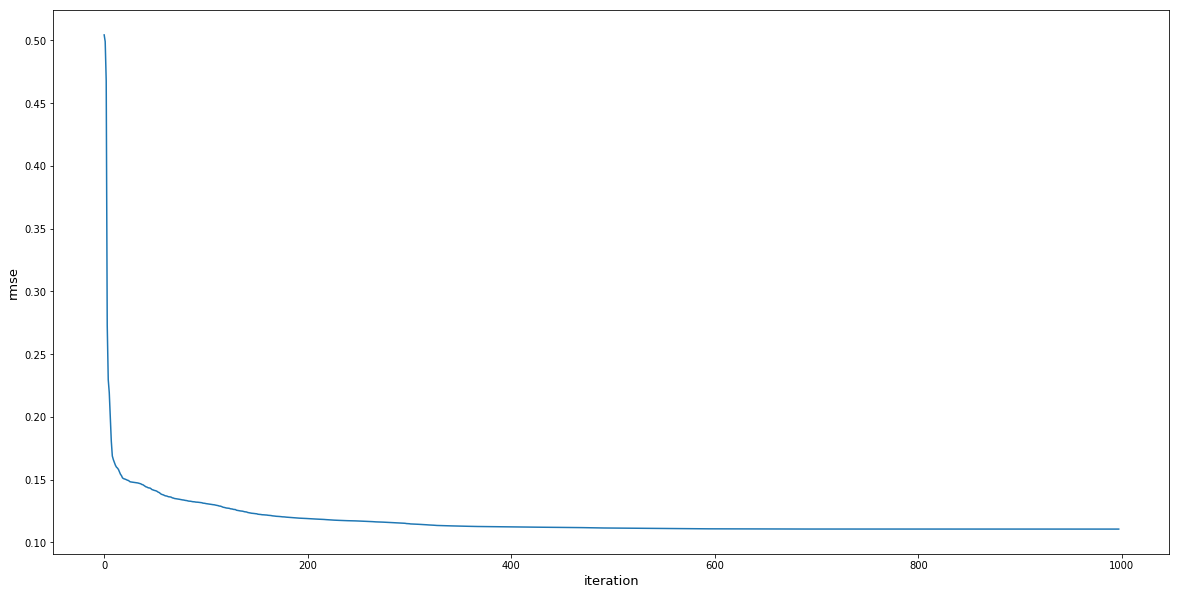

In [302]:
plot_trace()

* The above graph shows the error value after each iteration
* From the above graph we can see that error value decrease exponentially for first 15 iterations and then it decrease slowly upto 500 iterations and then error doesn't decrease
* This means after 500 iterations we have got optimal path

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

- From this assignment, I have learnt about how neural networks works and how it can be implemented using Nonlinear Regression and Nonlinear Logistic Regression.
- I have also learnt how to feed data into neural network and also about different activation functions to be used in different situations
- I have learned about kfold cross validation and how it can be used for selection of parameters
- After performing many experiments using kfold cross validation, I came to know that it gives better accuracies but will take more computational time
- Depending on the scenario, we can use kfold cross validation if you don't want to compromise on accuracy
- In this assignment, I came to know about nonLinear logistic regression.
- I have learnt how to do one hard encoding for the given input or output data
- I have learnt how this can be used for a classification problem
- I have learnt how to do parameter tunning using neural networks
- The challenges I faced is parameter selection using kfold because this takes more time for training the model over different values

## References

- http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+
- https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb
- https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.ipynb
- https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
- https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-1-hot-encoded-numpy-array
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


In [ ]:
from nn import NeuralNet

def kfold(X,T,**params):
    assert(X.shape[0]==T.shape[0])
    
    # default params
    k = params.pop('k',5)
    maxiter = params.pop('maxiter',100)
    alphas = params.pop('alpha',0.001)
    verbose = params.pop('verbose',False)
    optimize_alpha = params.pop('optimize_alpha',True)
    activation = params.pop('activation', 'sigmoid')
    # random indexing partition
    sz = X.shape[0]
    offset = int(sz/k)
    index = np.arange(sz)
    np.random.shuffle(index)
    
    part = []
    for i in range(0,k):
        if i == k-1:
            part.append(index[i*offset:])
        else:
            part.append(index[i*offset:(i+1)*offset])
    
    res = []
    for i in range(k):
        print("Training for test part",i+1,"started",)
        XTest = X[part[i]]
        YTest = T[part[i]]
        
        if optimize_alpha:
            cv_error = dict((alpha,0) for alpha in alphas)
        else:
            cv_error = dict((iter_,0) for iter_ in maxiter)
        
        for j in range(k):
            if j==i:
                continue
            if verbose:
                print("\tTraining for CV part",j+1,"started")
            XTrain = None
            YTrain = None
            XCv = X[part[j]]
            YCv = T[part[j]]
            
            for c in range(k):
                if c==j or c==i:
                    continue
                if XTrain is None:
                    XTrain = X[part[c]]
                    YTrain = T[part[c]]
                    continue
                XTrain = np.concatenate([XTrain,X[part[c]]])
                YTrain = np.concatenate([YTrain,T[part[c]]])
            
            #Training overe all params
            if optimize_alpha:
                for alpha in alphas:
                    nn = NeuralNet([X.shape[1],32,32,1])
                    result = nn.train(XTrain,YTrain,niter=maxiter,Lambda=alpha)
                    pred_y = nn.use(XCv)
                    error = rmse(pred_y,YCv)
                    cv_error[alpha]+=error
                if verbose:
                    print("\tTraining for CV part",j+1,"completed")
            else:
                for iter_ in maxiter:
                    nn = NeuralNet([X.shape[1],32,32,1])
                    result = nn.train(XTrain,YTrain,niter=iter_,Lambda=0.001)
                    pred_y = nn.use(XCv)
                    error = rmse(pred_y,YCv)
                    cv_error[iter_]+=error   
                if verbose:
                    print("\tTraining for CV part",j+1,"completed")
                    
        if optimize_alpha:
            #finding best param and retraining
            best_p = alphas[np.argmin(cv_error.values())]
            nn = NeuralNet([X.shape[1],32,32,1])
            result = nn.train(XTrain,YTrain,Lambda=best_p)
            pred_y = nn.use(XTest)
            error = rmse(pred_y,YTest)
            res.append( (best_p , error) )
            print("Best alpha is",best_p,"and error is ",error )
            
        else:
            #finding best params and retraining
            best_p = maxiter[np.argmin(cv_error.values())]
            nn = NeuralNet([X.shape[1],32,32,1])
            result = nn.train(XTrain,YTrain,Lambda=0.001,niter=best_p)
            pred_y = nn.use(XTest)
            error = rmse(pred_y,YTest)
            res.append( (best_p , error) )
            print("Best Iter is",best_p,"and error is ",error )

        print("Training for test part",i+1,"completed")
        print("-"*100)
    
    return res

# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
